In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('fbyield.csv', header=0, sep=';', squeeze=True, parse_dates=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


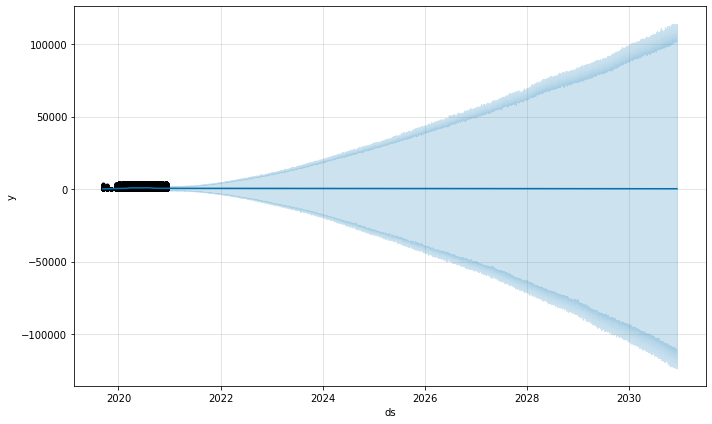

In [3]:
#create the model
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

In [4]:
future.head()

,ds
0,2019-09-12
1,2019-10-12
2,2019-11-12
3,2019-12-12
4,2019-12-13


In [5]:
future.tail()

,ds
4012,2030-12-07
4013,2030-12-08
4014,2030-12-09
4015,2030-12-10
4016,2030-12-11


Reference: https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4

In [6]:
#predict and fill in the future
forecast= m.predict(future)

In [7]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-09-12,179.282259,-1182.050438,1661.829083,179.282259,179.282259,-0.021287,-0.021287,-0.021287,-0.021287,-0.021287,-0.021287,0.0,0.0,0.0,175.465821
1,2019-10-12,239.861343,-1209.251906,1688.612466,239.861343,239.861343,-0.006507,-0.006507,-0.006507,-0.006507,-0.006507,-0.006507,0.0,0.0,0.0,238.300461
2,2019-11-12,302.459730,-1176.332489,1763.170272,302.459730,302.459730,0.024876,0.024876,0.024876,0.024876,0.024876,0.024876,0.0,0.0,0.0,309.983592
3,2019-12-12,363.038814,-1075.355641,1764.109227,363.038814,363.038814,-0.021287,-0.021287,-0.021287,-0.021287,-0.021287,-0.021287,0.0,0.0,0.0,355.310692
4,2019-12-13,365.058117,-1134.324761,1839.434599,365.058117,365.058117,-0.046819,-0.046819,-0.046819,-0.046819,-0.046819,-0.046819,0.0,0.0,0.0,347.966436


In [8]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [9]:
forecast[['ds','yhat_lower', 'yhat_upper', 'yhat' ]].tail(20)

,ds,yhat_lower,yhat_upper,yhat
3997,2030-11-22,-107888.767192,112078.273912,253.842354
3998,2030-11-23,-112657.137990,116953.239804,264.496178
3999,2030-11-24,-109566.395442,112826.505422,256.606971
4000,2030-11-25,-121110.056602,125400.717577,285.316413
4001,2030-11-26,-115931.731415,120903.085814,272.598709
4002,2030-11-27,-116139.323853,118964.780340,269.416073
4003,2030-11-28,-111192.191615,113606.194506,260.159428
4004,2030-11-29,-108304.122253,111805.561891,253.294342
4005,2030-11-30,-112077.674813,116612.385167,263.924990
4006,2030-12-01,-108498.492673,112210.882757,256.052648


(737108.6, 741627.4)

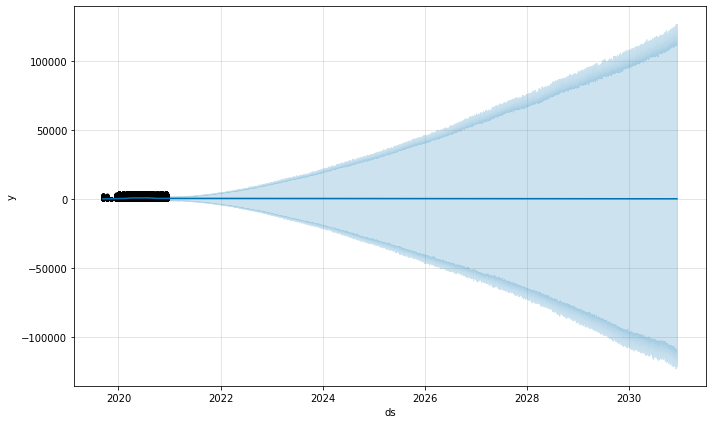

In [10]:
import matplotlib.pyplot as plt
m.plot(forecast);
plt.xlim()

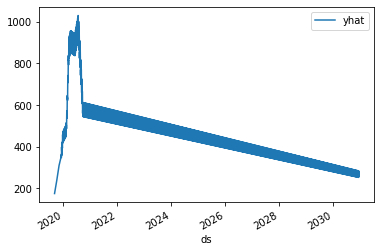

In [11]:
forecast.plot(x='ds', y= 'yhat')

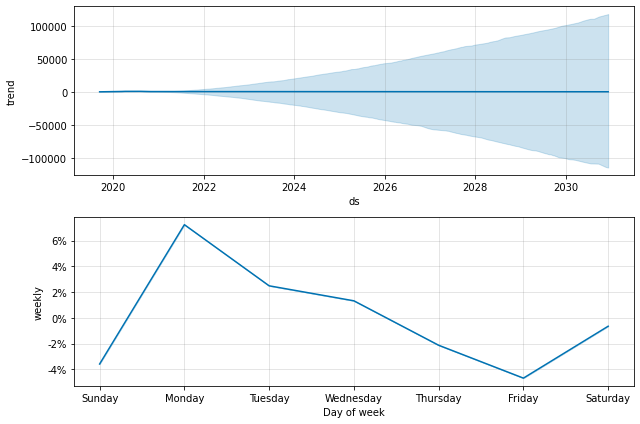

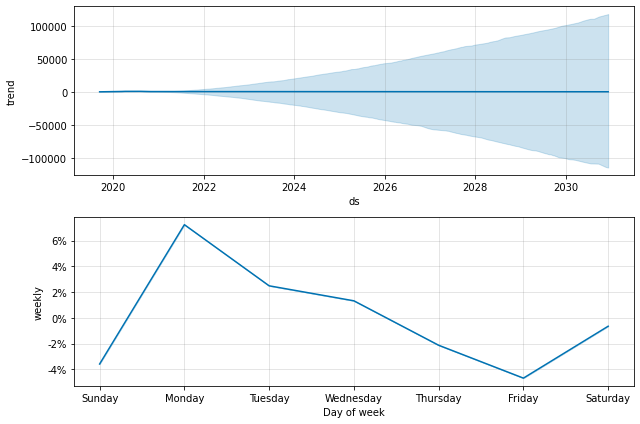

In [12]:
m.plot_components(forecast)

Reference : Diagnostics https://facebook.github.io/prophet/docs/diagnostics.html

https://facebook.github.io/prophet/docs/quick_start.html

In [13]:
#Here we do cross-validation to assess prediction performance on a horizon of 60 days, starting with 180 days of training data in the first cutoff and then making predictions every 18 days.
#On this 1 year time series, this corresponds to 8 total forecasts.
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='30 days', horizon = '60 days')


INFO:fbprophet:Making 8 forecasts with cutoffs between 2020-03-16 00:00:00 and 2020-10-12 00:00:00


In [15]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,6 days,1.643927e+06,1282.157142,999.356507,6.862183,0.818322
1,7 days,1.743428e+06,1320.389466,1035.838121,6.396508,0.803497
2,8 days,1.796577e+06,1340.364483,1051.644133,6.411994,0.794778
3,9 days,1.832685e+06,1353.767128,1063.071418,5.749847,0.788823
4,10 days,1.854708e+06,1361.876614,1070.931673,5.701133,0.784169


In [16]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [17]:
metric_df.tail()

,ds,yhat,y
108626,2030-12-07,263.353801,NaN
108627,2030-12-08,255.498326,NaN
108628,2030-12-09,284.083352,NaN
108629,2030-12-10,271.420246,NaN
108630,2030-12-11,268.251010,NaN


You can see from the above, that the last part of the dataframe has NaN for y... that's fine because we are only concerned about checking the forecast values versus the actual values so we can drop these NaN values.

In [18]:
metric_df.dropna(inplace=True)

In [19]:
metric_df.tail()

,ds,yhat,y
104974,2020-12-11,538.260584,0.0
104975,2020-12-11,538.260584,0.0
104976,2020-12-11,538.260584,0.0
104977,2020-12-11,538.260584,0.0
104978,2020-12-11,538.260584,0.0


In [20]:
metric_df.head()

,ds,yhat,y
0,2019-09-12,175.465821,0.0
1,2019-09-12,175.465821,0.0
2,2019-09-12,175.465821,0.0
3,2019-09-12,175.465821,0.0
4,2019-09-12,175.465821,0.0


In [21]:
#calculation of Root squared score
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.030407495012017227

In [22]:
#calculating root mean square error . For MSE, closer to zero is better
from sklearn.metrics import mean_squared_error
from math import sqrt
mse= mean_squared_error(metric_df.y, metric_df.yhat)
rmse = sqrt(mse)
print("The root mean square error is:", rmse)

The root mean square error is: 1133.485425976007
